In [984]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr 
wr.filterwarnings('ignore') 

In [985]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [986]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [987]:
df.Gender = le.fit_transform(df[['Gender']])

In [988]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [989]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Go Ahead

In [991]:
df_EDA=df.copy()
df_KNN=df.copy()
df_LR=df.copy()
df_logistic=df.copy()

# EDA

# <font color='red'>Basic-Info-Gathering</font>

In [994]:
## we can get data type info from this output as well as if there's any null value in any of the column's
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   int32  
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), int32(1)
memory usage: 167.2 KB


In [995]:
df_EDA.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [996]:
df_EDA.shape

(8555, 3)

In [997]:
# So before training a dataset, we need to delete duplicate values. So we need to check if there are any duplicated rows. 

df_EDA.duplicated().sum()

0

In [998]:
df_EDA.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [999]:
df_EDA['Gender'].value_counts()

Gender
1    5000
0    3555
Name: count, dtype: int64

# <font color='red'>EDA</font>

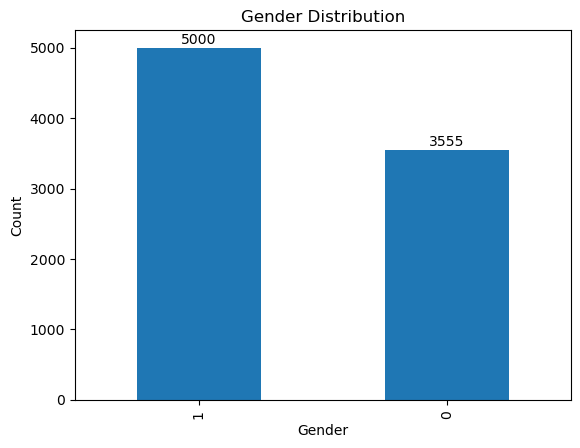

In [1001]:
df_EDA['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2,  # x-coordinate
             p.get_height()+50,            # y-coordinate
             int(p.get_height()),           # The count value
             ha='center')                   # Center alignment

plt.show()

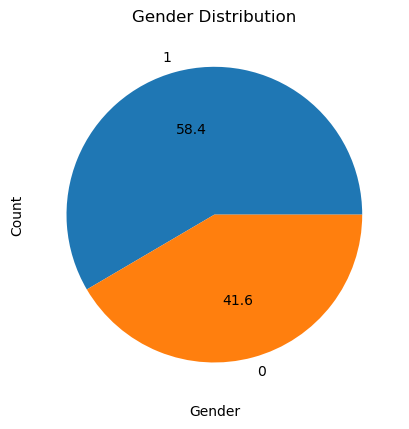

In [1002]:
#pie chart and showing percentage

df_EDA['Gender'].value_counts().plot(kind='pie',autopct='%.1f')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

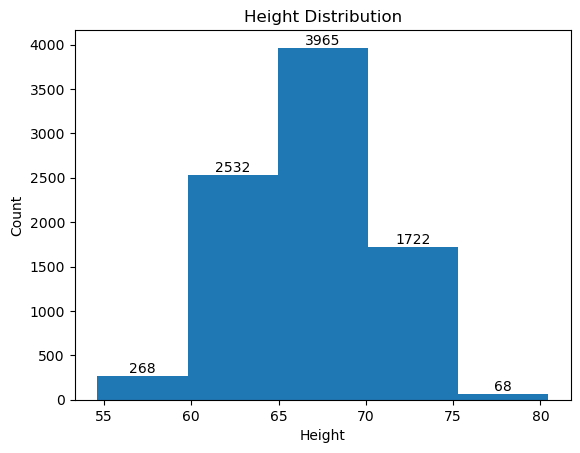

In [1003]:
##Showing height distribution

plt.hist(df_EDA['Height'],bins=5)
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Height Distribution')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2,  # x-coordinate
             p.get_height()+30,            # y-coordinate
             int(p.get_height()),           # The count value
             ha='center')                   # Center alignment

plt.show()

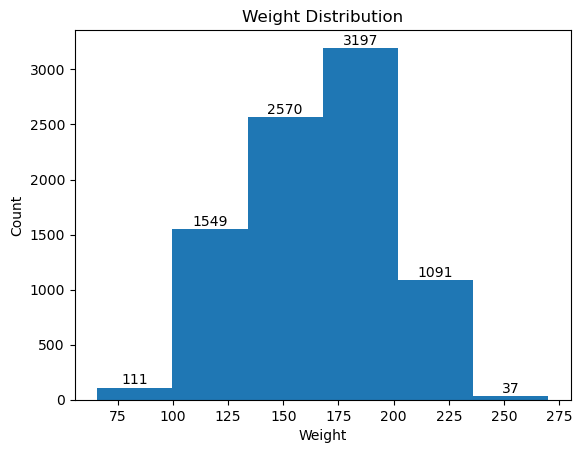

In [1004]:
##Showing weight distribution

plt.hist(df_EDA['Weight'],bins=6)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Weight Distribution')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2,  # x-coordinate
             p.get_height()+30,            # y-coordinate
             int(p.get_height()),           # The count value
             ha='center')                   # Center alignment

plt.show()

In [1005]:
df_EDA

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


Text(0, 0.5, 'Weight')

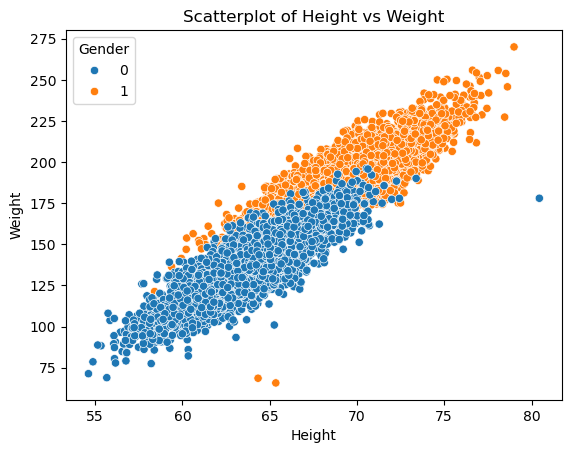

In [1006]:
## showing a clear border region between male and female and also we got some outliers

sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df_EDA)
# Optional: Add labels and a title
plt.title('Scatterplot of Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')


In [1007]:
df_EDA['Height'].value_counts()

Height
73.847017    1
63.784871    1
64.542250    1
60.772054    1
63.623574    1
            ..
71.329898    1
68.845117    1
69.427612    1
70.440713    1
60.921791    1
Name: count, Length: 8555, dtype: int64

In [1008]:
df_EDA_Copy=df_EDA.copy()

In [1009]:
df_EDA_Copy['Height'] = df_EDA_Copy['Height'].astype(str).str.extract(r'^(\d{2})')[0]
df_EDA_Copy['Weight'] = df_EDA_Copy['Weight'].astype(str).str.extract(r'^(\d{3})')[0]
df_EDA_Copy

,Gender,Height,Weight
0,1,73,241
1,1,68,162
2,1,74,212
3,1,71,220
4,1,69,206
...,...,...,...
8550,0,60,110
8551,0,63,129
8552,0,65,155
8553,0,67,151


In [1010]:
### Height and Weight becomes string

df_EDA_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  8555 non-null   int32 
 1   Height  8555 non-null   object
 2   Weight  8443 non-null   object
dtypes: int32(1), object(2)
memory usage: 167.2+ KB


In [1011]:
df_EDA_Copy['Height'].value_counts()

Height
67    837
68    803
69    758
66    743
65    713
64    660
63    647
70    614
62    526
71    525
61    401
72    329
60    290
73    203
59    150
74    111
58     89
75     47
57     41
76     26
56     22
77      7
78      5
55      5
54      2
80      1
Name: count, dtype: int64

Text(0, 0.5, 'Weight')

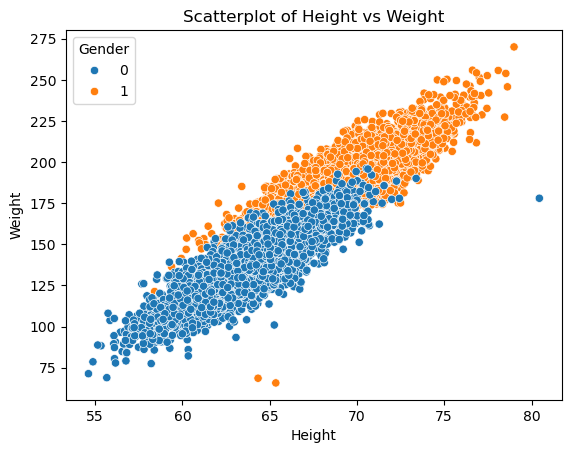

In [1012]:
## showing a clear border region between male and female and also we got some outliers

sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df_EDA)
# Optional: Add labels and a title
plt.title('Scatterplot of Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')


In [1013]:
###Selects rows where Gender is 0 (female) and Height is greater than 50
##Outliers
df_EDA[(df_EDA['Gender'] == 0) & (df_EDA['Height'] > 73)]

,Gender,Height,Weight
6328,0,80.450000,178.020675
7311,0,73.389586,190.078729


In [1014]:
df_EDA_Copy['Weight'].value_counts()

Weight
192    119
188    112
174    111
178    109
186    109
      ... 
254      1
248      1
243      1
245      1
234      1
Name: count, Length: 156, dtype: int64

In [1015]:
df_EDA[(df_EDA['Gender'] == 0) & (df_EDA['Weight'] > 150)]

,Gender,Height,Weight
5005,0,65.968019,156.802083
5007,0,65.652156,165.083001
5010,0,68.101172,166.575661
5016,0,70.128653,151.254270
5022,0,66.347537,157.380965
...,...,...,...
8539,0,66.495467,164.926816
8545,0,64.904695,150.171124
8546,0,67.602294,152.365016
8552,0,65.584057,155.942671


<Axes: >

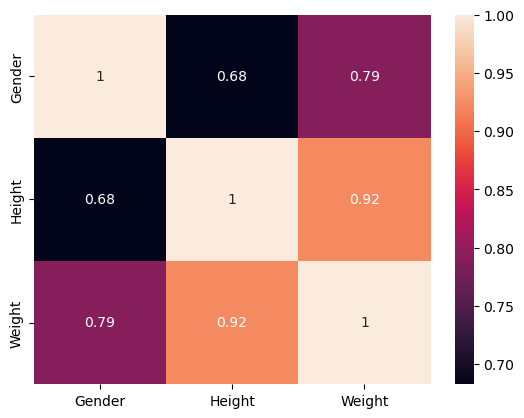

In [1016]:
sns.heatmap(df_EDA.corr(), annot=True)

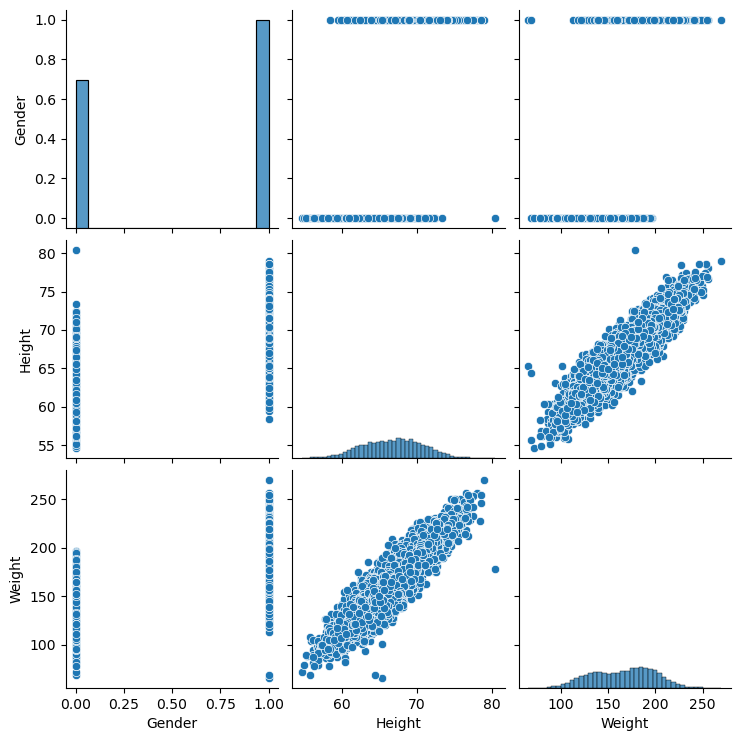

In [1017]:
sns.pairplot(df_EDA)

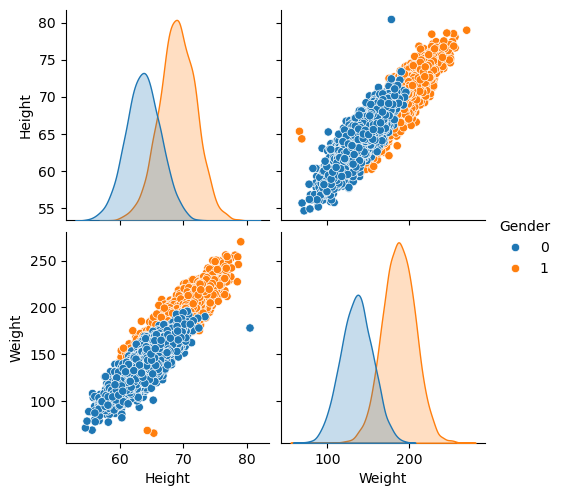

In [1018]:
sns.pairplot(df_EDA,hue='Gender')

# Least Squared Linear Regression:<font color='red'> For Regression Problem</font>

In [1020]:
df_LR.head(2)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473


In [1021]:
x=df_LR.iloc[:,0:2]
y=df_LR.iloc[:,-1]

In [1022]:
x.head(2)

,Gender,Height
0,1,73.847017
1,1,68.781904


In [1023]:
y.head(2)

0    241.893563
1    162.310473
Name: Weight, dtype: float64

In [1024]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [1025]:
lr_regression=LinearRegression()
lr_regression.fit(X_train,y_train)

LinearRegression()

In [1026]:
y_lr_regress_predict=lr_regression.predict(X_test)

In [1027]:
lr_mse_regression=mean_squared_error(y_test,y_lr_regress_predict)
print(f'Mean_Squared_Error in LR for the given regression problem is: {lr_mse_regression}')

Mean_Squared_Error in LR for the given regression problem is: 98.67769998146684


In [1028]:
r2_score_LR_regression=r2_score(y_test,y_lr_regress_predict)
print(f'R2_Score in LR for the given regression problem is: {r2_score_LR_regression}')

R2_Score in LR for the given regression problem is: 0.9036876162408722


# Additional(Just for checking): Least Squared Linear Regression:<font color='red'> For Classification Problem</font>

In [1030]:
df_LR.head(2)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473


In [1031]:
x1=df_LR.iloc[:,1:3]
y1=df_LR.iloc[:,0]

In [1032]:
x1.head(2)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473


In [1033]:
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=2)

In [1034]:
X_train.shape

(5988, 2)

In [1035]:
X_test.shape

(2567, 2)

In [1036]:
lr_classifier=LinearRegression()
lr_classifier.fit(X_train,y_train)

LinearRegression()

In [1037]:
y_lr_class_predict=lr_classifier.predict(X_test)

In [1038]:
lr_mse_classification=mean_squared_error(y_test,y_lr_class_predict)
print(f'Mean_Squared_Error in LR for the given classification problem is: {lr_mse_classification}')

Mean_Squared_Error in LR for the given classification problem is: 0.08581882017984795


In [1039]:
r2_score_LR_class=r2_score(y_test,y_lr_class_predict)
print(f'R2_Score in LR for the given classification problem is: {r2_score_LR_class}')

R2_Score in LR for the given classification problem is: 0.6457911813504067


# Regression Problem: <font color='red'> For KNN</font>

In [1041]:
df_KNN.head(2)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473


In [1042]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=91)

##use neighbor as 91 as root(datset shape)=92

In [1043]:
x2=df_KNN.iloc[:,0:2]
y2=df_KNN.iloc[:,-1]
x2.head(2)

,Gender,Height
0,1,73.847017
1,1,68.781904


In [1044]:
X_train,X_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3,random_state=2)

In [1045]:
knn_reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=91)

In [1046]:
y_knn_reg_predict=knn_reg.predict(X_test)

In [1047]:
knn_mse_reg=mean_squared_error(y_test,y_knn_reg_predict)
print(f'Mean_Squared_Error in KNN for the given regression is: {knn_mse_reg}')

Mean_Squared_Error in KNN for the given regression is: 102.72943492612157


In [1048]:
r2_score_knn_regress=r2_score(y_test,y_knn_reg_predict)
print(f'R2_Score in KNN for the given regression problem is: {r2_score_knn_regress}')

R2_Score in KNN for the given regression problem is: 0.8999020966278404


In [1049]:
df_KNN.shape

(8555, 3)

# Classification Problem: <font color='red'> For KNN</font>

In [1051]:
df_KNN.head(2)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473


In [1052]:
from sklearn.neighbors import KNeighborsClassifier
knn_class=KNeighborsClassifier(n_neighbors=5)

In [1053]:
x3=df_KNN.iloc[:,1:3]
y3=df_KNN.iloc[:,0]

In [1054]:
X_train,X_test,y_train,y_test=train_test_split(x3,y3,test_size=0.3,random_state=2)

In [1055]:
knn_class.fit(X_train,y_train)

KNeighborsClassifier()

In [1056]:
y_knn_class_predict=knn_class.predict(X_test)

In [1057]:
accuracy_knn_class = accuracy_score(y_test, y_knn_class_predict)
accuracy_knn_class

0.9092325671990651

# Classification Problem: <font color='red'> For Logistic-Regression</font>

In [1059]:
df_logistic.head(2)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473


In [1060]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

In [1061]:
lor.fit(X_train,y_train)

LogisticRegression()

In [1062]:
y_predict_logistic=lor.predict(X_test)

In [1063]:
accuracy_logistic_class = accuracy_score(y_test, y_predict_logistic)
accuracy_logistic_class

0.9213089209193611

# Comparison of Linear Rgeression and KNN Regressor

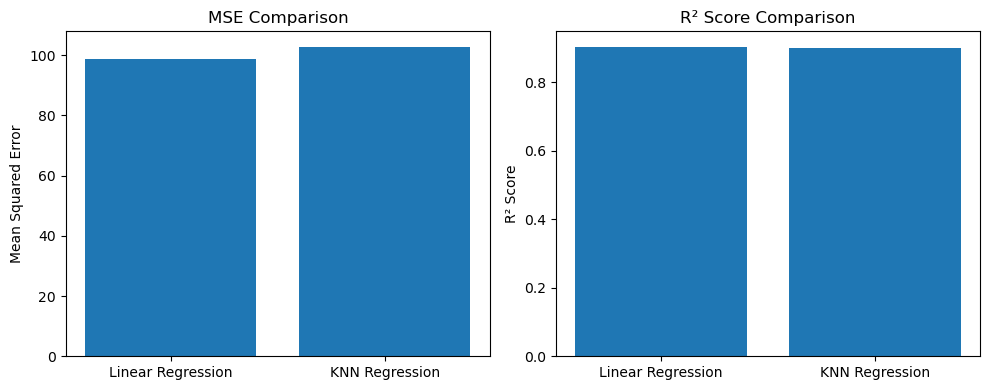

In [1065]:
models = ['Linear Regression', 'KNN Regression']
mse_scores = [lr_mse_regression, knn_mse_reg]   # Replace with your actual MSEs
r2_scores = [r2_score_LR_regression, r2_score_knn_regress]    # Replace with your actual R2 scores

# Create bar plots
x = range(len(models))

plt.figure(figsize=(10, 4))

# Plot MSE
plt.subplot(1, 2, 1)
plt.bar(x, mse_scores)
plt.xticks(x, models)
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')

# Plot R²
plt.subplot(1, 2, 2)
plt.bar(x, r2_scores)
plt.xticks(x, models)
plt.title('R² Score Comparison')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()


# Comparison of Logistic Rgeression and KNN Classifier

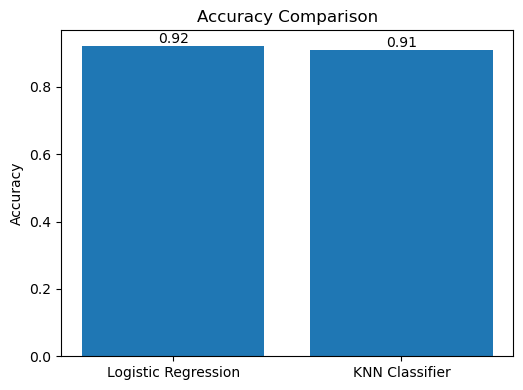

In [1150]:
models = ['Logistic Regression', 'KNN Classifier']
accuracy_scores = [accuracy_logistic_class, accuracy_knn_class]  # Replace with actual values

# Create bar plots
x = range(len(models))

plt.figure(figsize=(10, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
bars = plt.bar(x, accuracy_scores)
plt.xticks(x, models)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

# Add accuracy values on top of bars
for i, bar in enumerate(bars):
    yval = accuracy_scores[i]
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [1068]:
#plot